In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the aspect-based sentiment analysis data
data = pd.read_csv('Restaurant_Reviews_with_Aspect_Sentiment_Updated.csv')

# Show available restaurants
print("Available restaurants:")
print(data['Restaurant'].unique())



Available restaurants:
['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom' 'Ulavacharu' 'Shanghai

<Figure size 1200x600 with 0 Axes>

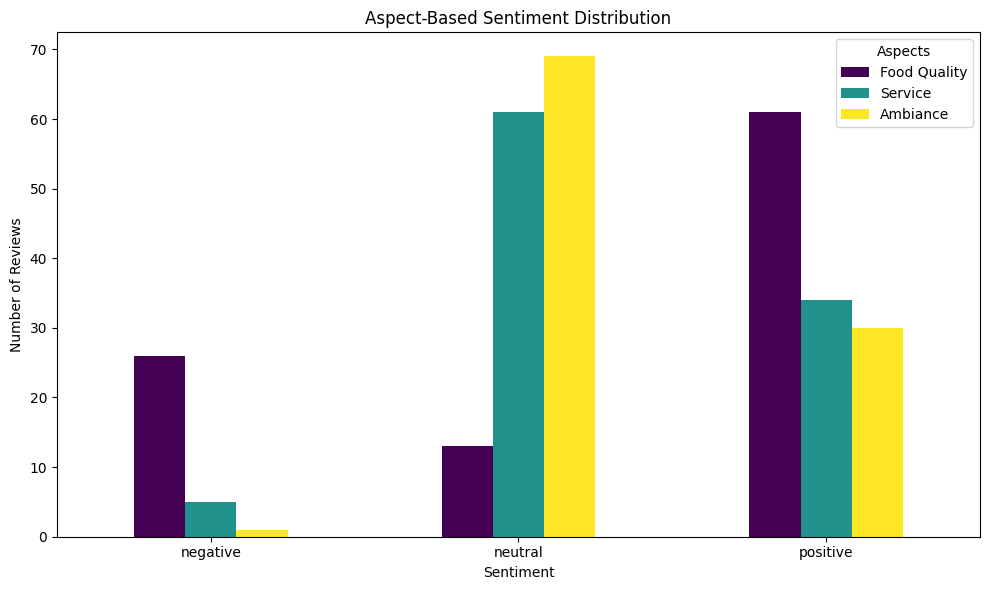

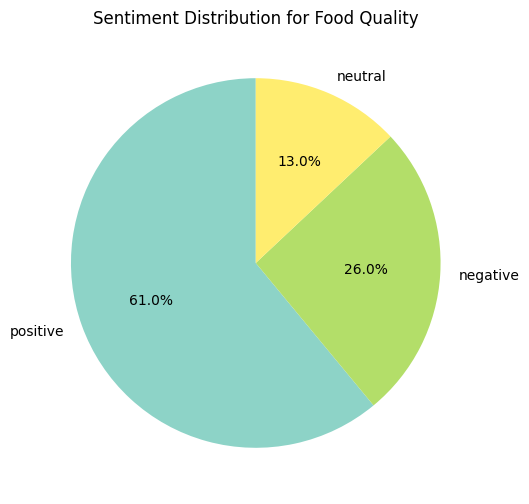

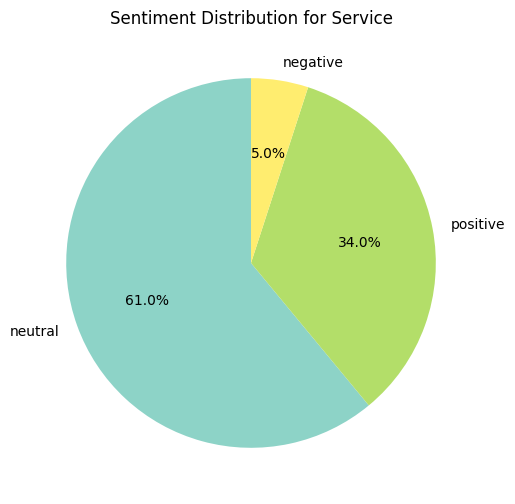

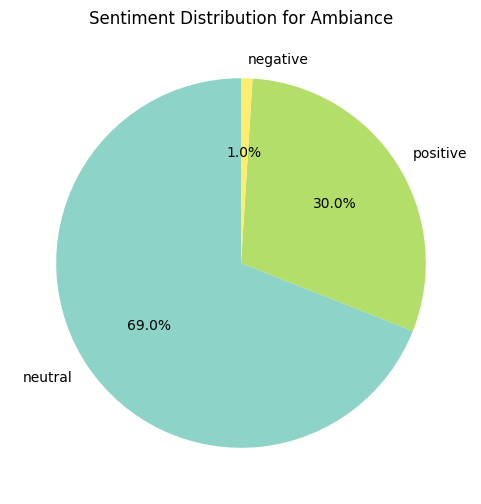

Restaurant Survival Status: Surviving


In [2]:
# User input for restaurant name (case insensitive)
restaurant_name = input("Enter the name of the restaurant: ").strip()
data = data[data['Restaurant'].str.lower() == restaurant_name.lower()]

if data.empty:
    print(f"No data found for restaurant: {restaurant_name}")
    exit()

# Step 2: Aggregate sentiments for each aspect
aspect_sentiments = {
    'Food Quality': data['Food Quality Sentiment'].value_counts(),
    'Service': data['Service Sentiment'].value_counts(),
    'Ambiance': data['Ambiance Sentiment'].value_counts()
}

# Convert aggregated data into a DataFrame for visualization
aspect_sentiments_df = pd.DataFrame(aspect_sentiments).fillna(0)
aspect_sentiments_df.head()

# Step 3: Plot sentiment distribution for each aspect
plt.figure(figsize=(12, 6))
aspect_sentiments_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Aspect-Based Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title="Aspects")
plt.tight_layout()
plt.show()

# Step 4: Pie charts for each aspect (optional)
for aspect in aspect_sentiments:
    plt.figure(figsize=(6, 6))
    aspect_sentiments[aspect].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3', labels=aspect_sentiments[aspect].index)
    plt.title(f'Sentiment Distribution for {aspect}')
    plt.ylabel('')
    plt.show()

# Step 5: Survival estimate (simple threshold example)
positive_counts = aspect_sentiments_df.loc['positive'] if 'positive' in aspect_sentiments_df.index else 0
threshold_percentage = 0.5  # Adjustable threshold percentage
threshold = threshold_percentage * positive_counts.sum()

restaurant_survival = "Surviving" if positive_counts.sum() > threshold else "At Risk"
print(f"Restaurant Survival Status: {restaurant_survival}")


In [3]:
aspect_sentiments_df.head()

,Food Quality,Service,Ambiance
positive,61,58,53
neutral,32,30,44
negative,7,12,3


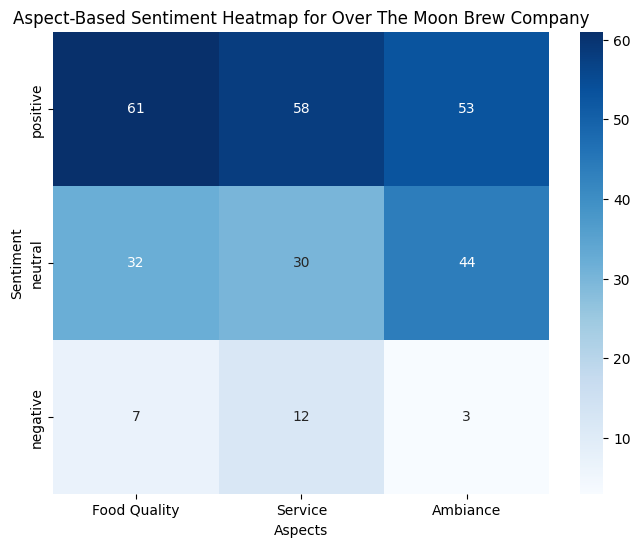

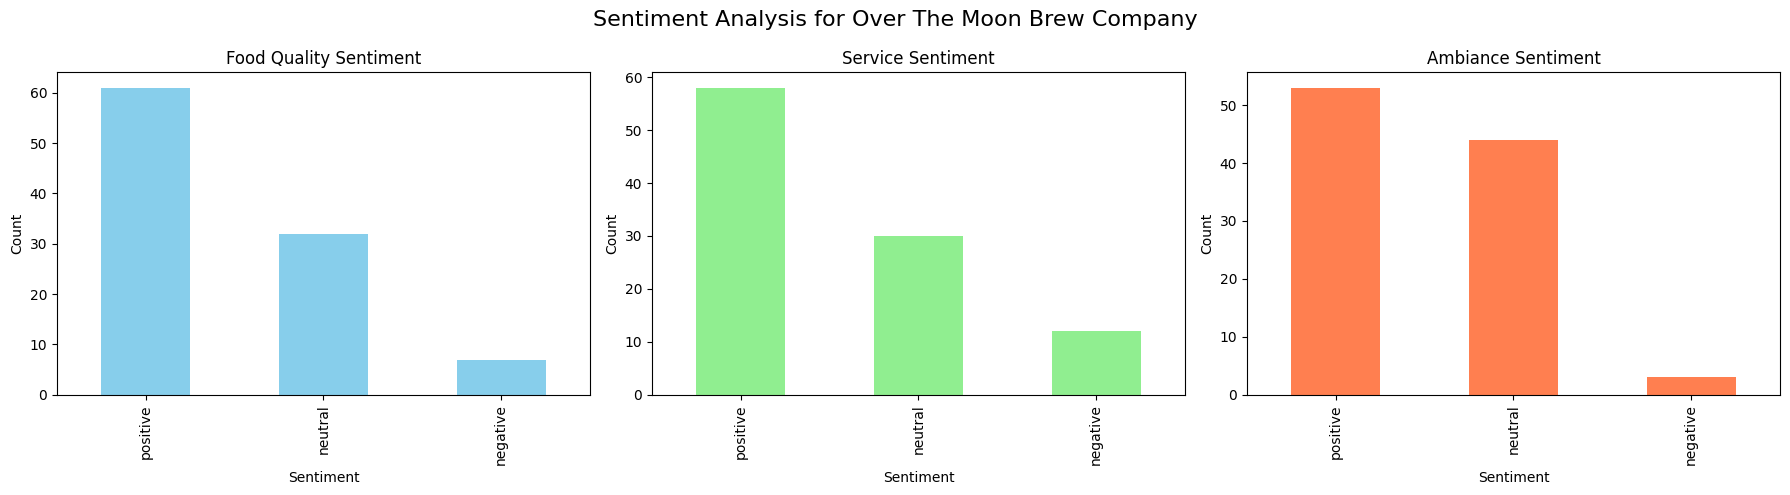

Restaurant Survival Status: Surviving


In [4]:

restaurant_data = data[data['Restaurant'] == restaurant_name]

# Step 2: Heatmap for overall aspect sentiment distribution
aspect_sentiments = {
    'Food Quality': restaurant_data['Food Quality Sentiment'].value_counts(),
    'Service': restaurant_data['Service Sentiment'].value_counts(),
    'Ambiance': restaurant_data['Ambiance Sentiment'].value_counts()
}
aspect_sentiments_df = pd.DataFrame(aspect_sentiments).fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(aspect_sentiments_df, annot=True, fmt='.0f', cmap="Blues", cbar=True)
plt.title(f"Aspect-Based Sentiment Heatmap for {restaurant_name}")
plt.xlabel("Aspects")
plt.ylabel("Sentiment")
plt.show()

# Step 3: Histogram for each aspect sentiment
# Group by the sentiment of each aspect
food_sentiment_counts = restaurant_data['Food Quality Sentiment'].value_counts()
service_sentiment_counts = restaurant_data['Service Sentiment'].value_counts()
ambiance_sentiment_counts = restaurant_data['Ambiance Sentiment'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(f"Sentiment Analysis for {restaurant_name}", fontsize=16)

food_sentiment_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Food Quality Sentiment")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")

service_sentiment_counts.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title("Service Sentiment")
axes[1].set_xlabel("Sentiment")
axes[1].set_ylabel("Count")

ambiance_sentiment_counts.plot(kind='bar', ax=axes[2], color='coral')
axes[2].set_title("Ambiance Sentiment")
axes[2].set_xlabel("Sentiment")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Step 4: Survival estimate (simple threshold example)
positive_counts = aspect_sentiments_df.loc['positive']
threshold = 0.5 * positive_counts.sum()  # 50% positive sentiments across aspects
restaurant_survival = "Surviving" if positive_counts.sum() > threshold else "At Risk"
print(f"Restaurant Survival Status: {restaurant_survival}")


In [5]:
aspect_thresholds = {}

# Define survival status for each aspect
for aspect, counts in aspect_sentiments.items():
    positive_count = counts.get('positive', 0)
    total_count = counts.sum()
    threshold = 0.5 * total_count  # 50% threshold
    status = "Surviving" if positive_count > threshold else "At Risk"
    aspect_thresholds[aspect] = {
        "Positive Count": positive_count,
        "Total Count": total_count,
        "Survival Status": status
    }

# Display survival statuses for each aspect
print(f"Aspect-Based Survival Analysis for {restaurant_name}:")
for aspect, stats in aspect_thresholds.items():
    print(f"{aspect}: {stats['Survival Status']} "
          f"(Positive: {stats['Positive Count']}, Total: {stats['Total Count']})")

# Step 5: Overall survival status
overall_positive = sum([stats["Positive Count"] for stats in aspect_thresholds.values()])
overall_total = sum([stats["Total Count"] for stats in aspect_thresholds.values()])
overall_threshold = 0.5 * overall_total
overall_status = "Surviving" if overall_positive > overall_threshold else "At Risk"

print(f"\nOverall Restaurant Survival Status: {overall_status}")

Aspect-Based Survival Analysis for Over The Moon Brew Company:
Food Quality: Surviving (Positive: 61, Total: 100)
Service: Surviving (Positive: 58, Total: 100)
Ambiance: Surviving (Positive: 53, Total: 100)

Overall Restaurant Survival Status: Surviving
